## Logistic Regression

Logistic regression involves fitting a curve to numeric data to make predictions about binary events. Arguably one of the most widely used machine learning methods, this chapter will provide an overview of the technique while illustrating how to apply it to fundraising data.

### Building simple logistic regression models
The donors dataset contains 93,462 examples of people mailed in a fundraising solicitation for paralyzed military veterans. The donated column is 1 if the person made a donation in response to the mailing and 0 otherwise. This binary outcome will be the dependent variable for the logistic regression model.

The remaining columns are features of the prospective donors that may influence their donation behavior. These are the model's independent variables.

When building a regression model, it is often helpful to form a hypothesis about which independent variables will be predictive of the dependent variable. The bad_address column, which is set to 1 for an invalid mailing address and 0 otherwise, seems like it might reduce the chances of a donation. Similarly, one might suspect that religious interest (interest_religion) and interest in veterans affairs (interest_veterans) would be associated with greater charitable giving.

In this exercise, you will use these three factors to create a simple model of donation behavior.

In [1]:
# url = "https://assets.datacamp.com/production/repositories/718/datasets/9055dac929e4515286728a2a5dae9f25f0e4eff6/donors.csv"
# where9am  = read.csv(url)
donors = read.csv("donors.csv")

# Examine the dataset to identify potential independent variables
str(donors)

# Explore the dependent variable
table(donors$donated)

# Build the donation model
donation_model <- glm(donated ~ bad_address + interest_religion + interest_veterans, 
                      data = donors, family = "binomial")

# Summarize the model results
summary(donation_model)

'data.frame':	93462 obs. of  13 variables:
 $ donated          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ veteran          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bad_address      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age              : int  60 46 NA 70 78 NA 38 NA NA 65 ...
 $ has_children     : int  0 1 0 0 1 0 1 0 0 0 ...
 $ wealth_rating    : int  0 3 1 2 1 0 2 3 1 0 ...
 $ interest_veterans: int  0 0 0 0 0 0 0 0 0 0 ...
 $ interest_religion: int  0 0 0 0 1 0 0 0 0 0 ...
 $ pet_owner        : int  0 0 0 0 0 0 1 0 0 0 ...
 $ catalog_shopper  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ recency          : Factor w/ 2 levels "CURRENT","LAPSED": 1 1 1 1 1 1 1 1 1 1 ...
 $ frequency        : Factor w/ 2 levels "FREQUENT","INFREQUENT": 1 1 1 1 1 2 2 1 2 2 ...
 $ money            : Factor w/ 2 levels "HIGH","MEDIUM": 2 1 2 2 2 2 2 2 2 2 ...



    0     1 
88751  4711 


Call:
glm(formula = donated ~ bad_address + interest_religion + interest_veterans, 
    family = "binomial", data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3480  -0.3192  -0.3192  -0.3192   2.5678  

Coefficients:
                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)       -2.95139    0.01652 -178.664   <2e-16 ***
bad_address       -0.30780    0.14348   -2.145   0.0319 *  
interest_religion  0.06724    0.05069    1.327   0.1847    
interest_veterans  0.11009    0.04676    2.354   0.0186 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 37316  on 93458  degrees of freedom
AIC: 37324

Number of Fisher Scoring iterations: 5


### Making a binary prediction
In the previous exercise, you used the glm() function to build a logistic regression model of donor behavior. As with many of R's machine learning methods, you can apply the predict() function to the model object to forecast future behavior. By default, predict() outputs predictions in terms of log odds unless type = "response" is specified. This converts the log odds to probabilities.

Because a logistic regression model estimates the probability of the outcome, it is up to you to determine the threshold at which the probability implies action. One must balance the extremes of being too cautious versus being too aggressive. For example, if you were to solicit only the people with a 99% or greater donation probability, you may miss out on many people with lower estimated probabilities that still choose to donate. This balance is particularly important to consider for severely imbalanced outcomes, such as in this dataset where donations are relatively rare.

In [8]:
# Estimate the donation probability
donors$donation_prob <- predict(donation_model, type = "response")

# Find the donation probability of the average prospect
mean(donors$donation_prob)

# Predict a donation if probability of donation is greater than average (0.0504)
donors$donation_pred <- ifelse(donors$donation_prob > 0.0504, 1, 0)

# consistency table
table(donors$donation_pred, donors$donated)

# Calculate the model's accuracy
mean(donors$donation_pred == donors$donated)

# obtain a ROC CURVE
# install.packages("ROCR")
# library(ROCR)
# train.roc <- prediction(donors$donation_prob, donors$donated)
# plot(performance(train.roc, "tpr", "fpr"), col = "red", main = "ROC Curve for train data")
# abline(0, 1, lty = 8, col = "blue")
# train.auc <- performance(train.roc, "auc")
# slot(train.auc, "y.values")

[1] 0.05040551

   
        0     1
  0 73389  3815
  1 15362   896

[1] 0.794815

package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\RtmpkDadit\downloaded_packages


Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.5102

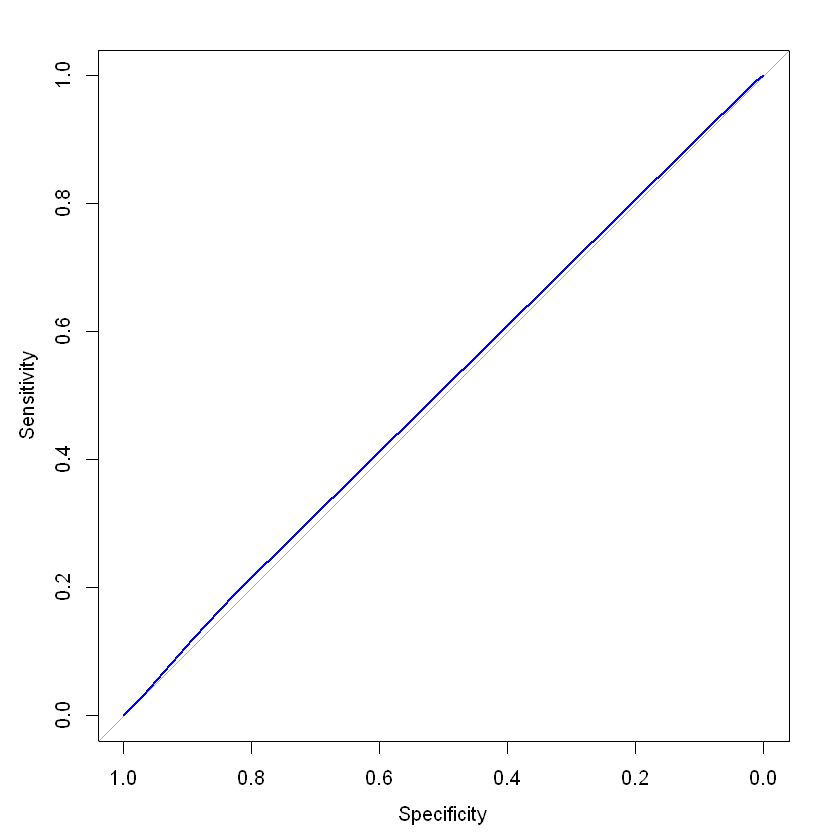

In [10]:
# Load the pROC package
#install.packages("pROC")
library(pROC)

# Create a ROC curve
ROC <- roc(donors$donated, donors$donation_prob)

# Plot the ROC curve
plot(ROC, col = "blue")

# Calculate the area under the curve (AUC)
auc(ROC)

### Coding categorical features
Sometimes a dataset contains numeric values that represent a categorical feature.

In the donors dataset, wealth_rating uses numbers to indicate the donor's wealth level:

0 = Unknown

1 = Low

2 = Medium

3 = High

This exercise illustrates how to prepare this type of categorical feature and examines its impact on a logistic regression model. The dataframe donors is loaded in your workspace.

In [11]:
# Convert the wealth rating to a factor
donors$wealth_levels <- factor(donors$wealth_rating, levels = c(0,1,2,3), labels = c("Unknown", "Low", "Medium", "High"))

# Use relevel() to change reference category
donors$wealth_levels <- relevel(donors$wealth_levels, ref =  "Medium")

# See how our factor coding impacts the model
summary(glm(donated ~ wealth_levels, data = donors, family = "binomial")
)


Call:
glm(formula = donated ~ wealth_levels, family = "binomial", data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3320  -0.3243  -0.3175  -0.3175   2.4582  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -2.91894    0.03614 -80.772   <2e-16 ***
wealth_levelsUnknown -0.04373    0.04243  -1.031    0.303    
wealth_levelsLow     -0.05245    0.05332  -0.984    0.325    
wealth_levelsHigh     0.04804    0.04768   1.008    0.314    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 37323  on 93458  degrees of freedom
AIC: 37331

Number of Fisher Scoring iterations: 5


### Handling missing data
Some of the prospective donors have missing age data. Unfortunately, R will exclude any cases with NA values when building a regression model.

One workaround is to replace, or impute, the missing values with an estimated value. After doing so, you may also create a missing data indicator to model the possibility that cases with missing data are different in some way from those without.

In [12]:
# Find the average age among non-missing values
summary(donors$age)

# Impute missing age values with the mean age
donors$imputed_age <- ifelse(is.na(donors$age), round(mean(donors$age, na.rm = TRUE),2),donors$age)

# Create missing value indicator for age
donors$missing_age <- ifelse(is.na(donors$age),1, 0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00   48.00   62.00   61.65   75.00   98.00   22546 

### Building a more sophisticated model
One of the best predictors of future giving is a history of recent, frequent, and large gifts. In marketing terms, this is known as R/F/M:

1. Recency
2. Frequency
3. Money

Donors that haven't given both recently and frequently may be especially likely to give again; in other words, the combined impact of recency and frequency may be greater than the sum of the separate effects.

Because these predictors together have a greater impact on the dependent variable, their joint effect must be modeled as an interaction.


Call:
glm(formula = donated ~ money + recency * frequency, family = "binomial", 
    data = donors)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3696  -0.3696  -0.2895  -0.2895   2.7924  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -3.01142    0.04279 -70.375   <2e-16 ***
moneyMEDIUM                        0.36186    0.04300   8.415   <2e-16 ***
recencyLAPSED                     -0.86677    0.41434  -2.092   0.0364 *  
frequencyINFREQUENT               -0.50148    0.03107 -16.143   <2e-16 ***
recencyLAPSED:frequencyINFREQUENT  1.01787    0.51713   1.968   0.0490 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37330  on 93461  degrees of freedom
Residual deviance: 36938  on 93457  degrees of freedom
AIC: 36948

Number of Fisher Scoring iterations: 6


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.5785

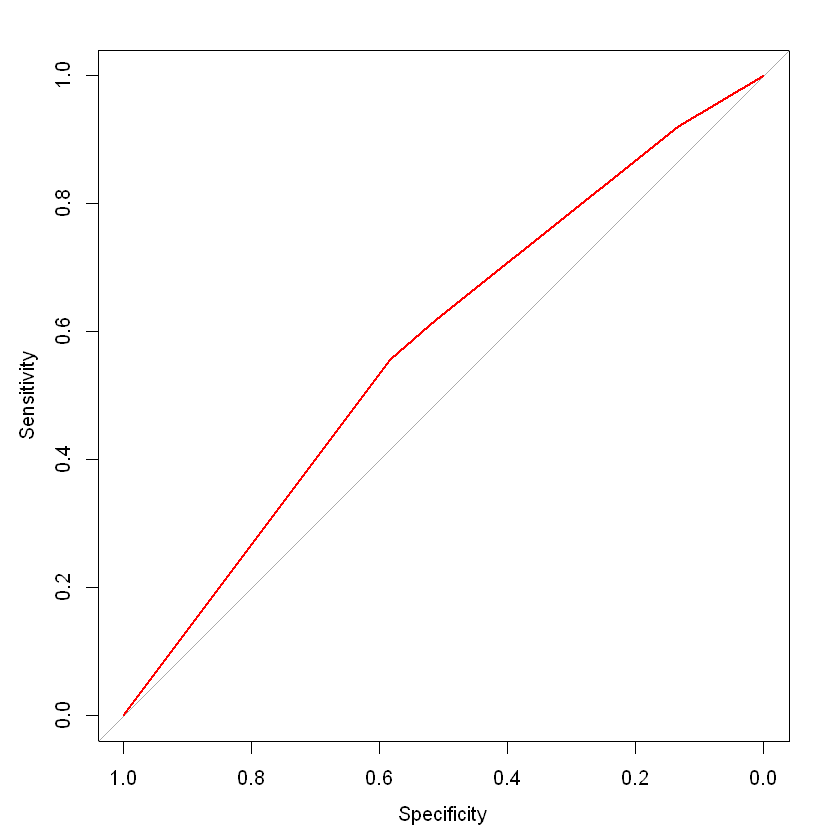

In [15]:
# Build a recency, frequency, and money (RFM) model
rfm_model <- glm(donated ~ money+recency*frequency, data = donors, family = "binomial")

# Summarize the RFM model to see how the parameters were coded
summary(rfm_model)

# Compute predicted probabilities for the RFM model
rfm_prob <- predict(rfm_model, type = "response")

# Plot the ROC curve and find AUC for the new model
library(pROC)
ROC <- roc(donors$donated, rfm_prob)
plot(ROC, col = "red")
auc(ROC)

### Building a stepwise regression model
In the absence of subject-matter expertise, stepwise regression can assist with the search for the most important predictors of the outcome of interest.

In this exercise, you will use a forward stepwise approach to add predictors to the model one-by-one until no additional benefit is seen.

Start:  AIC=37332.13
donated ~ 1



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ frequency          1    28502 37122
+ money              1    28621 37241
+ wealth_rating      1    28705 37326
+ has_children       1    28705 37326
+ age                1    28707 37328
+ imputed_age        1    28707 37328
+ wealth_levels      3    28704 37328
+ interest_veterans  1    28709 37330
+ donation_prob      1    28710 37330
+ donation_pred      1    28710 37330
+ catalog_shopper    1    28710 37330
+ pet_owner          1    28711 37331
<none>                    28714 37332
+ interest_religion  1    28712 37333
+ recency            1    28713 37333
+ bad_address        1    28714 37334
+ veteran            1    28714 37334

Step:  AIC=37024.77
donated ~ frequency



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ money              1    28441 36966
+ wealth_rating      1    28493 37018
+ wealth_levels      3    28490 37019
+ has_children       1    28494 37019
+ donation_prob      1    28498 37023
+ interest_veterans  1    28498 37023
+ catalog_shopper    1    28499 37024
+ donation_pred      1    28499 37024
+ age                1    28499 37024
+ imputed_age        1    28499 37024
+ pet_owner          1    28499 37024
<none>                    28502 37025
+ interest_religion  1    28501 37026
+ recency            1    28501 37026
+ bad_address        1    28502 37026
+ veteran            1    28502 37027

Step:  AIC=36949.71
donated ~ frequency + money



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ wealth_levels      3    28427 36942
+ wealth_rating      1    28431 36942
+ has_children       1    28432 36943
+ interest_veterans  1    28438 36948
+ donation_prob      1    28438 36949
+ catalog_shopper    1    28438 36949
+ donation_pred      1    28439 36949
+ age                1    28439 36949
+ imputed_age        1    28439 36949
+ pet_owner          1    28439 36949
<none>                    28441 36950
+ interest_religion  1    28440 36951
+ recency            1    28441 36951
+ bad_address        1    28441 36951
+ veteran            1    28441 36952

Step:  AIC=36945.48
donated ~ frequency + money + wealth_levels



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ has_children       1    28416 36937
+ age                1    28424 36944
+ imputed_age        1    28424 36944
+ interest_veterans  1    28424 36945
+ donation_prob      1    28424 36945
+ catalog_shopper    1    28425 36945
+ donation_pred      1    28425 36945
<none>                    28427 36945
+ pet_owner          1    28425 36946
+ interest_religion  1    28426 36947
+ recency            1    28427 36947
+ bad_address        1    28427 36947
+ veteran            1    28427 36947

Step:  AIC=36938.4
donated ~ frequency + money + wealth_levels + has_children



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
+ pet_owner          1    28413 36937
+ donation_prob      1    28413 36937
+ catalog_shopper    1    28413 36937
+ interest_veterans  1    28413 36937
+ donation_pred      1    28414 36938
<none>                    28416 36938
+ interest_religion  1    28415 36939
+ age                1    28416 36940
+ imputed_age        1    28416 36940
+ recency            1    28416 36940
+ bad_address        1    28416 36940
+ veteran            1    28416 36940

Step:  AIC=36932.25
donated ~ frequency + money + wealth_levels + has_children + 
    pet_owner



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 70916/93462 rows from a combined fit"

                    Df Deviance   AIC
<none>                    28413 36932
+ donation_prob      1    28411 36932
+ interest_veterans  1    28411 36932
+ catalog_shopper    1    28412 36933
+ donation_pred      1    28412 36933
+ age                1    28412 36933
+ imputed_age        1    28412 36933
+ recency            1    28413 36934
+ interest_religion  1    28413 36934
+ bad_address        1    28413 36934
+ veteran            1    28413 36934


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.5849

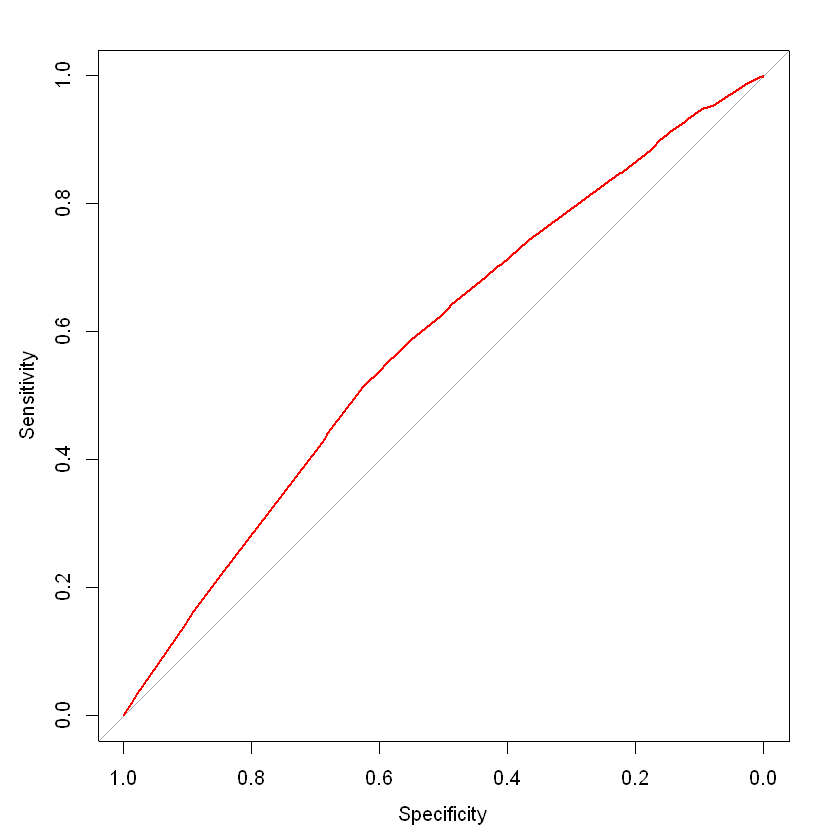

In [16]:
# Specify a null model with no predictors
null_model <- glm(donated ~ 1, data = donors, family = "binomial")

# Specify the full model using all of the potential predictors
full_model <- glm(donated ~., data = donors, family = "binomial")

# Use a forward stepwise algorithm to build a parsimonious model
step_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward")

# Estimate the stepwise donation probability
step_prob <- predict(step_model, type = "response")

# Plot the ROC of the stepwise model
ROC <- roc(donors$donated, step_prob)
plot(ROC, col = "red")
auc(ROC)